<a href="https://colab.research.google.com/github/soumyamaster/Hacktoberfest2022/blob/master/Task_1_detect_building_cracks_towers_roof.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Fri Aug  4 18:41:03 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8     9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content/drive/MyDrive/Defect


Installing ULTRALYTICS

In [ ]:
# Pip install method

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.4/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

## Custom Training on a random dataset

Mounting Colab with Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Defect

/content/drive/MyDrive/Defect


DETECTION ON THE DATASET

In [ ]:
%cd /content/drive/MyDrive/Defect

!yolo task=detect mode=train model=yolov8s.pt data= /content/drive/MyDrive/Defect/data.yaml epochs=25 imgsz=224 plots=True

/content/drive/MyDrive/Defect
100% 21.5M/21.5M [00:00<00:00, 153MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/drive/MyDrive/Defect/data.yaml, epochs=25, patience=50, batch=16, imgsz=224, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=tor

In [ ]:
!ls runs/detect/train/

args.yaml					     train_batch0.jpg
confusion_matrix.png				     train_batch15.jpg
events.out.tfevents.1691174517.43c486445548.10276.0  train_batch16.jpg
F1_curve.png					     train_batch17.jpg
P_curve.png					     train_batch1.jpg
PR_curve.png					     train_batch2.jpg
R_curve.png					     val_batch0_labels.jpg
results.csv					     val_batch0_pred.jpg
results.png					     weights


Confusion Matrix

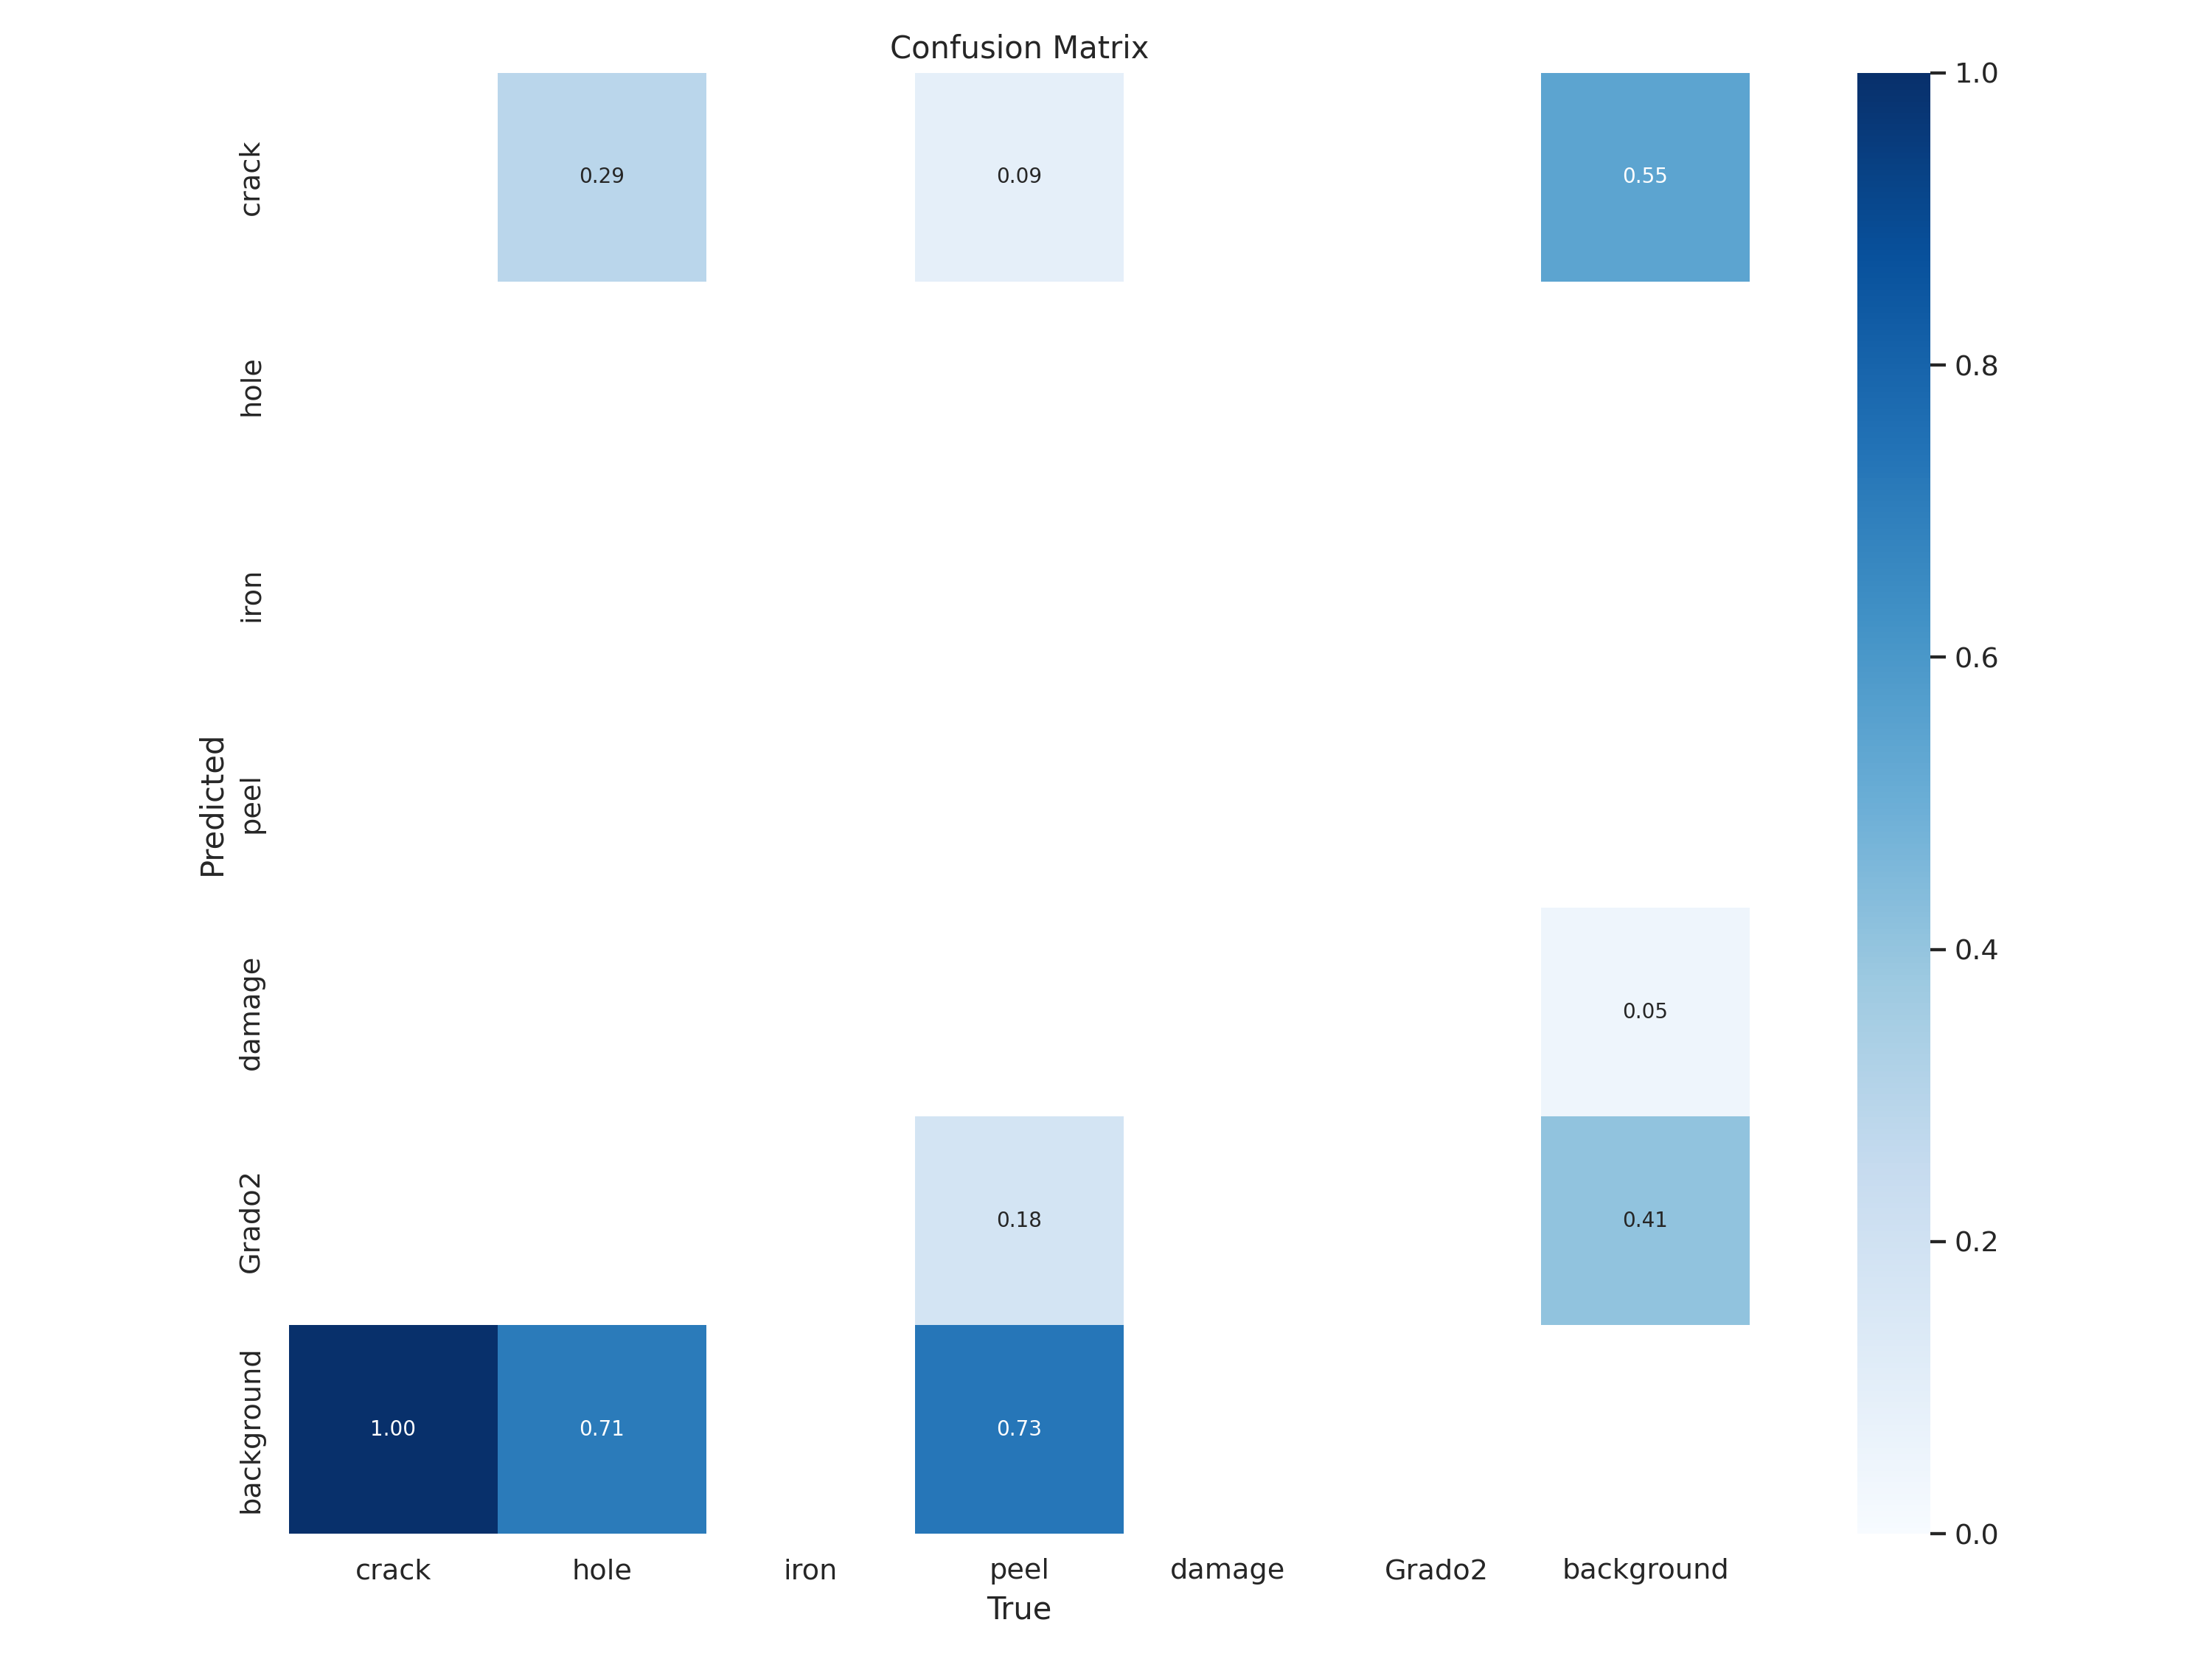

In [ ]:
Image(filename='/content/drive/MyDrive/Defect/runs/detect/train/confusion_matrix.png', width=600)

Results

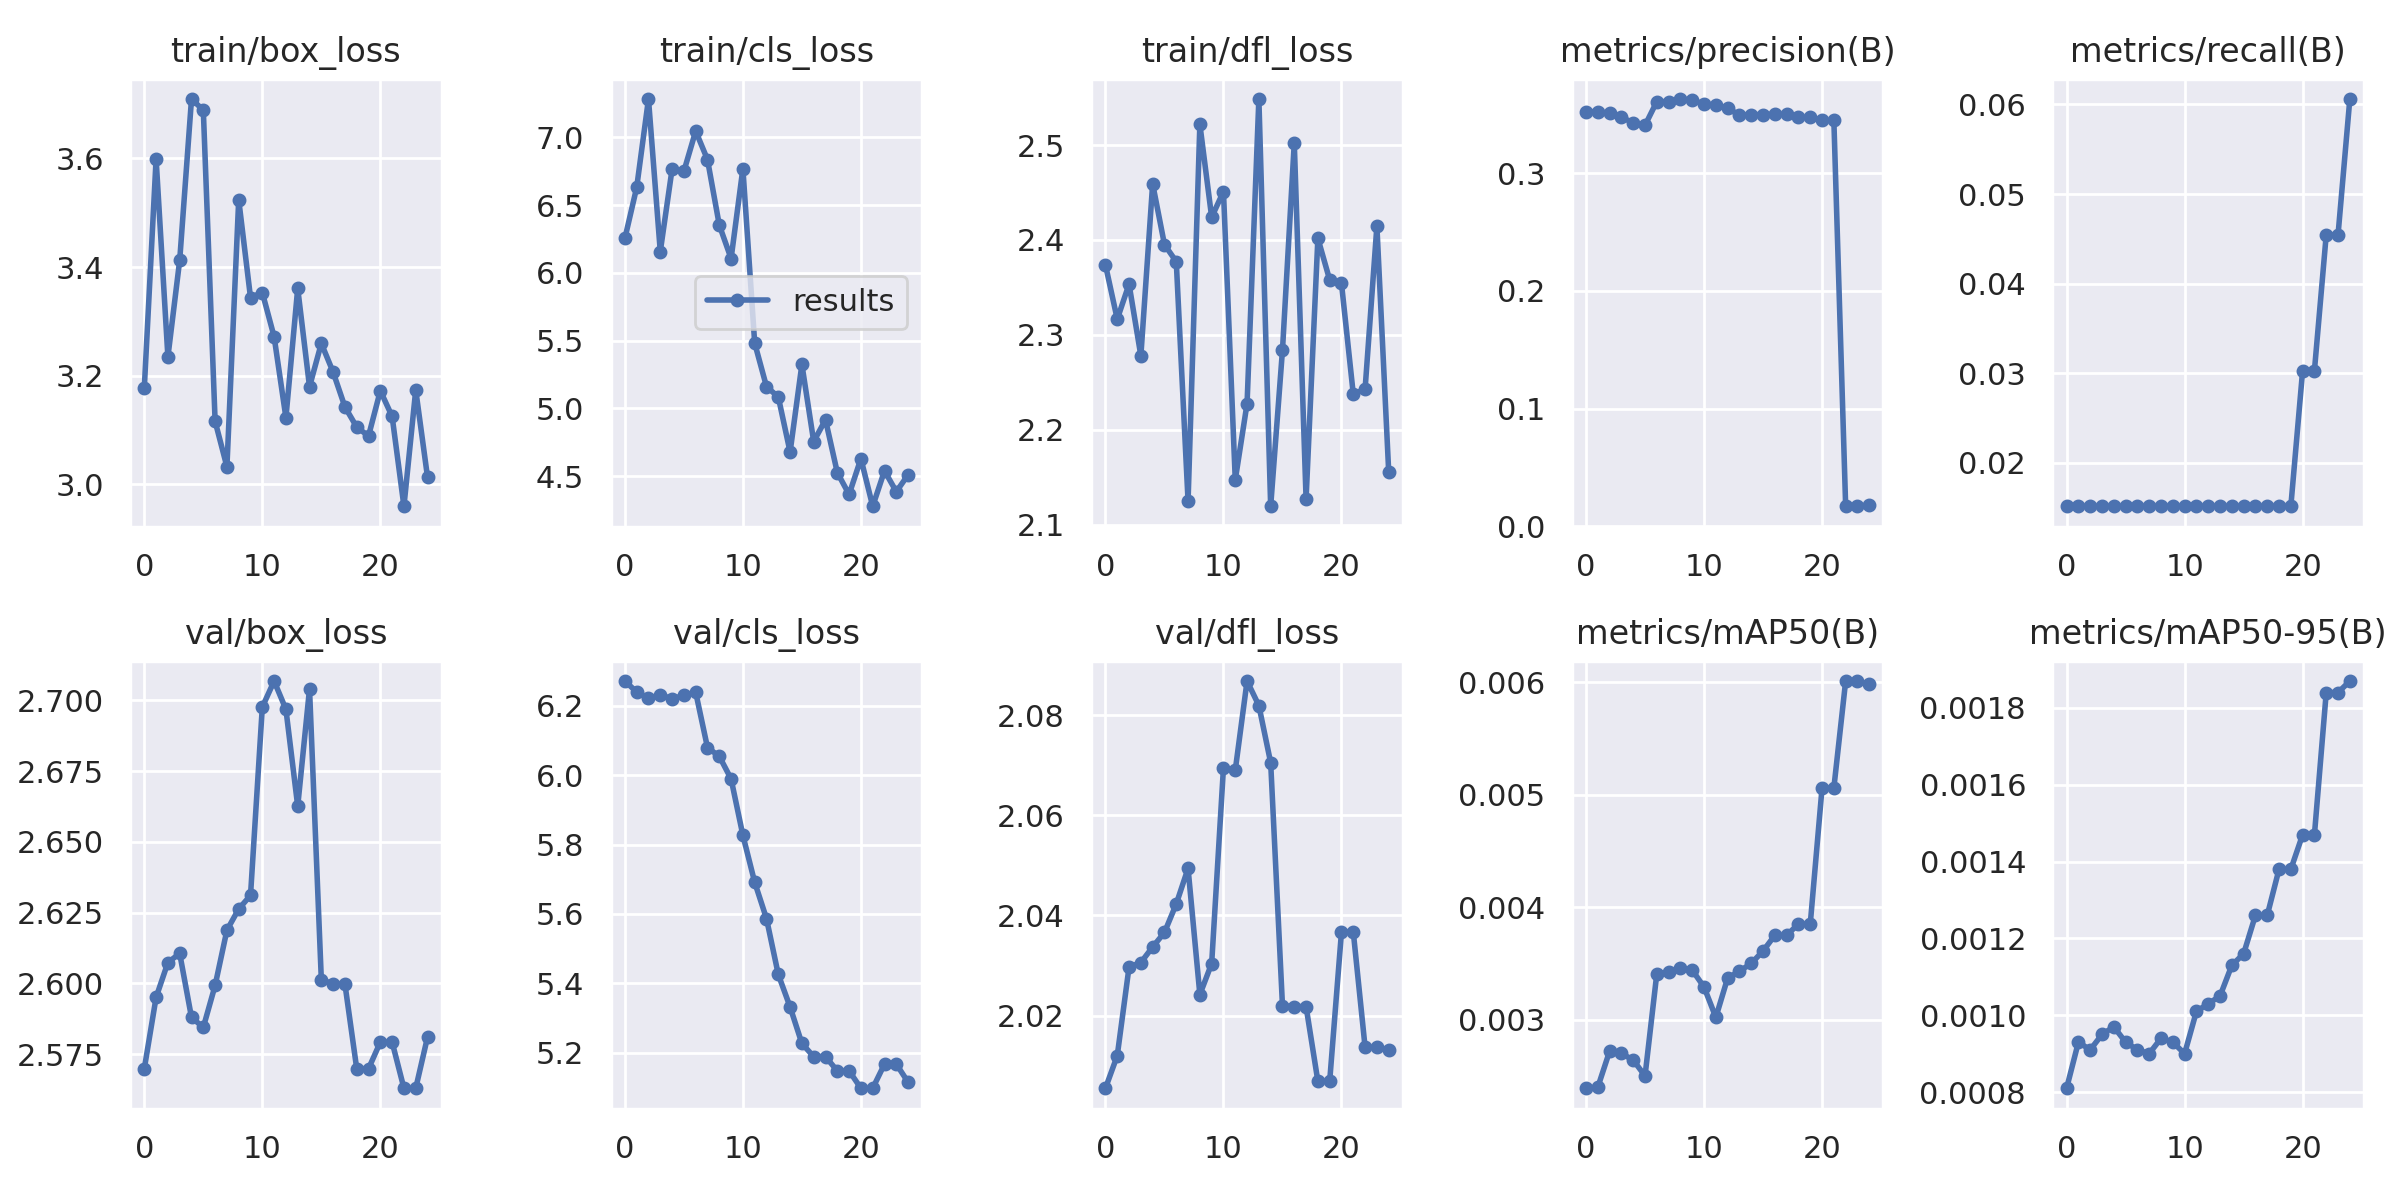

In [ ]:
Image(filename='/content/drive/MyDrive/Defect/runs/detect/train/results.png', width=600)

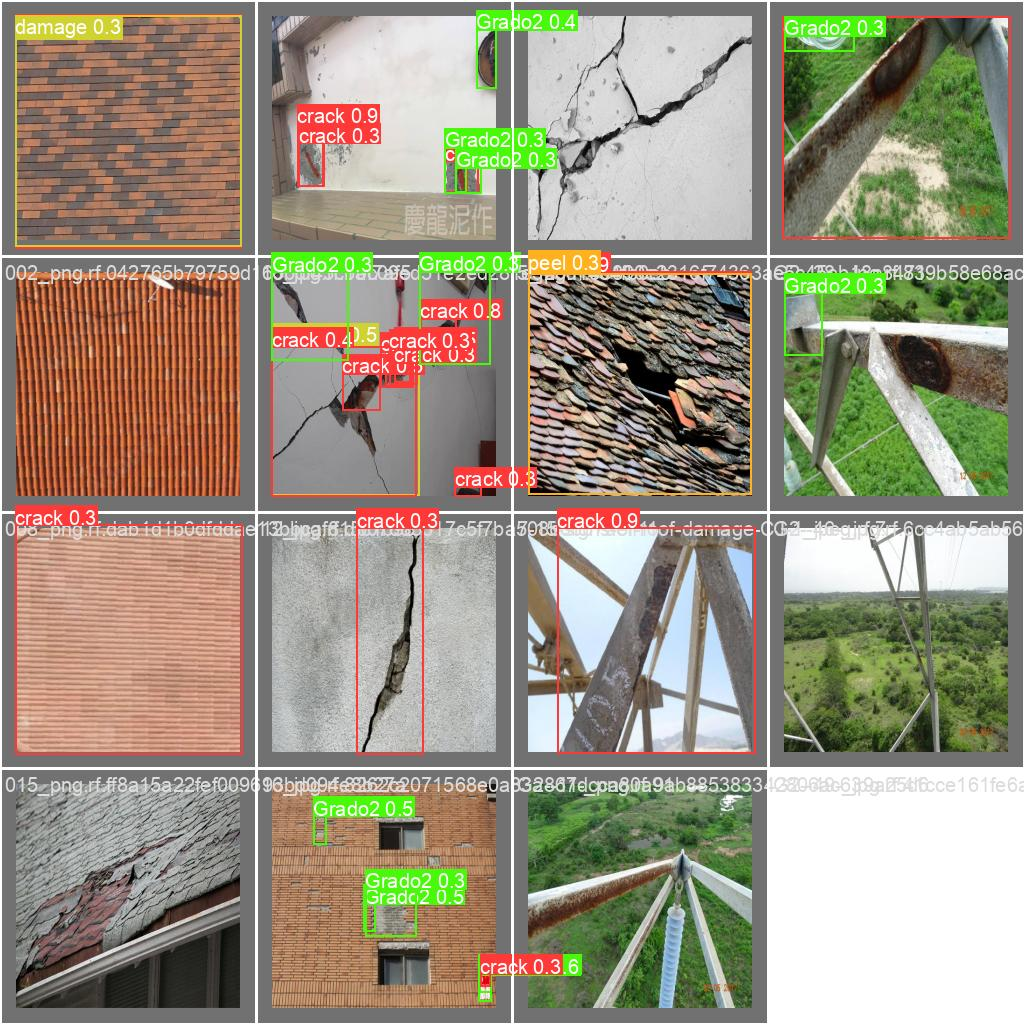

In [ ]:
Image(filename='/content/drive/MyDrive/Defect/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate the Model

In [ ]:
!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data=/content/drive/MyDrive/Defect/data.yaml

2023-08-04 18:44:41.934910: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-04 18:44:42.781791: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127906 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/drive/MyDrive/Defect/valid/labels.cache... 15 images, 3 backgrounds, 0 corrupt: 100% 15/15 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 7, len(boxes) = 40. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed datas

## Inference with the Model

In [ ]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/Defect/runs/detect/train/weights/best.pt conf=0.25 source=/content/drive/MyDrive/Defect/test/images

2023-08-04 18:45:00.582852: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-04 18:45:01.866871: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127906 parameters, 0 gradients, 28.4 GFLOPs
image 1/23 /content/drive/MyDrive/Defect/test/images/016_png.rf.05cce69a7f0a6f31ac51c8ce6d9508b7.jpg: 224x224 7.2ms
image 2/23 /content/drive/MyDrive/Defect/test/images/022_png.rf.615dbe13ef440be4ac82ba49d8dea62e.jpg: 224x224 7.1ms
image 3/23 /content/drive/MyDrive/Defect/test/images/026_png.rf.cf8f5439706d689920f4b5d4d472a00a.jpg: 224x224 1 crack, 1 hole, 7.1ms
image 4/23 /content/drive/MyDri

**NOTE:** Let's take a look at few results.

In [ ]:
from ultralytics import YOLO

model = YOLO('/content/drive/MyDrive/Defect/runs/detect/train/weights/best.pt')


In [ ]:
results = model.predict(source='/content/drive/MyDrive/Defect/test/images/*', save=True, conf=0.2, save_txt=True, save_crop=False, line_thickness=1)

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127906 parameters, 0 gradients, 28.4 GFLOPs
Results saved to runs/detect/predict
17 labels saved to runs/detect/predict/labels
